# Центральная предельная теорема

Импортируем библиотеки, необходимые для работы.

In [215]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as sts
%matplotlib inline

Рассмотрим распределение Лапласа: $f(x) = {\alpha / 2} * e^{-\alpha * |x - \beta|}$.

Положим $\alpha = 1$ и $\beta = 0$ и сгенерируем выборку объема 1000.

In [216]:
laplace_rv = sts.laplace(0, 1)
sample = laplace_rv.rvs(1000)

Гистограмма выборки и теоретическая плотность распределения:

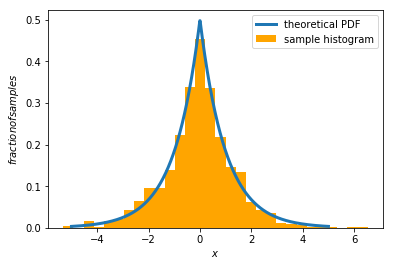

In [217]:
# Гистограмма выборки:
plt.hist(sample, normed=True, color='orange', bins=30, label='sample histogram')
plt.xlabel('$x$')
plt.ylabel('$fraction of samples$')

# на том же графике построим теоретическую плотность распределения:
x = np.linspace(-5, 5, 1000)
pdf = laplace_rv.pdf(x)
plt.plot(x, pdf, label='theoretical PDF', lw=3)
plt.legend()

## Определим функции, необходимые для дальнейшей работы

In [218]:
# Функция, генерирующая выборку объема n

def generate_sample(n):
    return laplace_rv.rvs(n)

In [219]:
# Функция для вычисления выборочного среднего

def calculate_mean(sample):
    return sum(sample) / len(sample)

In [220]:
# Функция, возвращающая список выборочных средних k выборок объема n

def means_for_samples(n, k=1000):
    result = []
    for _ in range(k):
        result.append(calculate_mean(generate_sample(n)))
    return result

Теоретические значения математического ожидания и дисперсии (см. Википедию): E$x = \beta = 0$ и D$x = 2/\alpha^2 = 2$

Согласно ЦПТ, $\mu=Ex=0$ и $\sigma^2=Dx/n=2/n$

In [221]:
from math import sqrt

# Функция для вычисления среднеквадратического отклонения:

def sigma(n): return sqrt(2./n)

Напишем функцию для построения гистограммы распределения выборочных средних для выборок объема n.

In [222]:
def plot_histogram(n):
    sample_means = means_for_samples(n)
    plt.hist(sample_means, normed=True, color='orange', bins=30, label='sample means histogram')

Функция для построения графика плотности нормального распределения при соответствующем n.

In [233]:
from math import sqrt
def plot_pdf(n):
    x = np.linspace(-2, 2, 1000)
    pdf = sts.norm(0, sigma(n)).pdf(x)
    plt.plot(x, pdf, label='theoretical PDF', lw=3)

### Графики при n=5

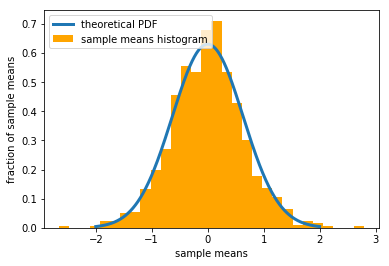

In [234]:
n = 5
plot_histogram(n)
plot_pdf(n)
plt.legend(loc=2)
plt.xlabel('sample means')
plt.ylabel('fraction of sample means')
plt.show()

### Графики при n=50

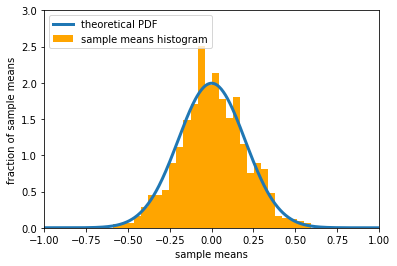

In [235]:
n = 50
plot_histogram(n)
plot_pdf(n)
plt.legend(loc=2)
plt.axis([-1, 1, 0, 3])
plt.xlabel('sample means')
plt.ylabel('fraction of sample means')
plt.show()

### Графики при n=500

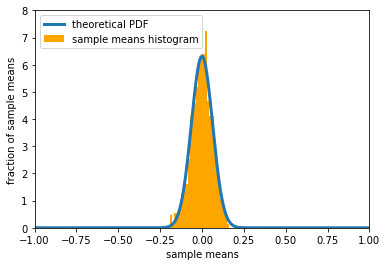

In [236]:
n = 500
plot_histogram(n)
plot_pdf(n)
plt.legend(loc=2)
plt.axis([-1, 1, 0, 8])
plt.xlabel('sample means')
plt.ylabel('fraction of sample means')
plt.show()

Вывод - с ростом n точность аппроксимации растет.